In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
df = pd.read_excel('cars-data-new.xlsx', engine='openpyxl')
df

,Id,Brand,Model,Varient,Mf_Year,Kilometer,Fuel,Owner,Location,Price in Rs,Transmission
0,1.0,Hyundai,i20,MAGNA O 1.2 Manual,2010.0,30152.0,Petrol,1.0,Mumbai,260199.0,Manual
1,2.0,Hyundai,i10,MAGNA 1.1 IRDE2 Manual,2014.0,32627.0,Petrol,1.0,Mumbai,339199.0,Manual
2,3.0,Hyundai,i20,ASTA 1.2 Manual,2014.0,9249.0,Petrol,2.0,Mumbai,411599.0,Manual
3,4.0,Hyundai,Grand,SPORTS 1.2 VTVT Manual,2016.0,23846.0,Petrol,3.0,Mumbai,393899.0,Manual
4,5.0,Tata,Tiago,XZA+ 1.2 RTN Automatic,2020.0,87351.0,Petrol,1.0,Mumbai,603499.0,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
5003,5004.0,Volkswagen,Vento,COMFORTLINE 1.0 TSI MT Manual,2021.0,22649.0,Petrol,1.0,Amhedabad,933399.0,Manual
5004,5005.0,Hyundai,Creta,1.6 CRDI SX PLUS AUTO Automatic,2018.0,58756.0,Diesel,1.0,Amhedabad,1192499.0,Automatic
5005,5006.0,Jeep,Compass,LIMITED 1.4 AT Automatic,2017.0,63038.0,Petrol,1.0,Amhedabad,1125799.0,Automatic
5006,5007.0,Maruti,S,VXI PLUS Manual,2019.0,32473.0,Petrol,1.0,Amhedabad,464299.0,Manual


In [3]:
df.columns

Index(['Id', 'Brand', 'Model', 'Varient', 'Mf_Year', 'Kilometer', 'Fuel',
       'Owner', 'Location', 'Price in Rs', 'Transmission'],
      dtype='object')

In [4]:
df.shape

(5008, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            5008 non-null   float64
 1   Brand         5008 non-null   object 
 2   Model         5008 non-null   object 
 3   Varient       5008 non-null   object 
 4   Mf_Year       5008 non-null   float64
 5   Kilometer     5008 non-null   float64
 6   Fuel          5008 non-null   object 
 7   Owner         5008 non-null   float64
 8   Location      5008 non-null   object 
 9   Price in Rs   5008 non-null   float64
 10  Transmission  4938 non-null   object 
dtypes: float64(5), object(6)
memory usage: 430.5+ KB


In [6]:
df.isnull().sum()

Id               0
Brand            0
Model            0
Varient          0
Mf_Year          0
Kilometer        0
Fuel             0
Owner            0
Location         0
Price in Rs      0
Transmission    70
dtype: int64

In [7]:
df['Price in Rs'].unique()

array([ 260199.,  339199.,  411599., ...,  439599.,  432999., 1192499.])

In [8]:
df.describe()

,Id,Mf_Year,Kilometer,Owner,Price in Rs
count,5008.000000,5008.000000,5008.000000,5008.000000,5.008000e+03
mean,2504.500000,2016.932907,45344.814097,1.248403,6.738205e+05
std,1445.829404,2.416220,30595.521987,0.483188,3.570029e+05
min,1.000000,2008.000000,71.000000,1.000000,1.923990e+05
25%,1252.750000,2015.000000,23043.000000,1.000000,4.322790e+05
50%,2504.500000,2017.000000,40368.000000,1.000000,5.722490e+05
75%,3756.250000,2019.000000,62457.250000,1.000000,8.013990e+05
max,5008.000000,2022.000000,353688.000000,4.000000,3.287199e+06


<AxesSubplot:xlabel='Price in Rs', ylabel='count'>

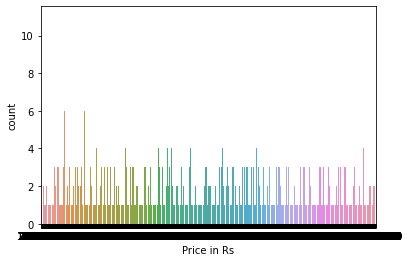

In [9]:
sns.countplot(x="Price in Rs", data=df)

# EDA

In [10]:
df.head()

,Id,Brand,Model,Varient,Mf_Year,Kilometer,Fuel,Owner,Location,Price in Rs,Transmission
0,1.0,Hyundai,i20,MAGNA O 1.2 Manual,2010.0,30152.0,Petrol,1.0,Mumbai,260199.0,Manual
1,2.0,Hyundai,i10,MAGNA 1.1 IRDE2 Manual,2014.0,32627.0,Petrol,1.0,Mumbai,339199.0,Manual
2,3.0,Hyundai,i20,ASTA 1.2 Manual,2014.0,9249.0,Petrol,2.0,Mumbai,411599.0,Manual
3,4.0,Hyundai,Grand,SPORTS 1.2 VTVT Manual,2016.0,23846.0,Petrol,3.0,Mumbai,393899.0,Manual
4,5.0,Tata,Tiago,XZA+ 1.2 RTN Automatic,2020.0,87351.0,Petrol,1.0,Mumbai,603499.0,Automatic


In [11]:
dfcorr=df.corr()

<AxesSubplot:>

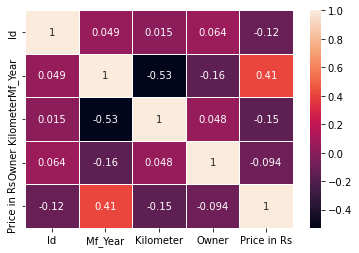

In [12]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

In [13]:
dfcorr['Kilometer'].sort_values()

Mf_Year       -0.527567
Price in Rs   -0.152898
Id             0.014962
Owner          0.047963
Kilometer      1.000000
Name: Kilometer, dtype: float64

Text(0.5, 1.0, 'Price in Rs')

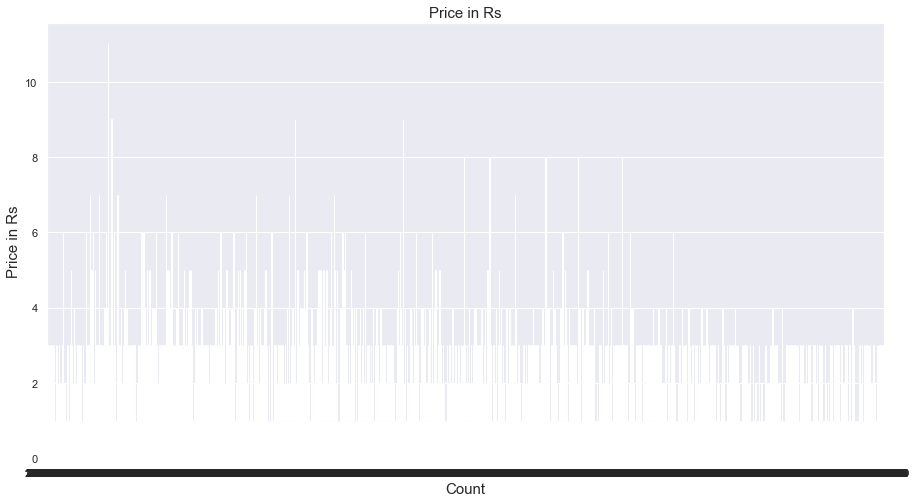

In [14]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(df['Price in Rs'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Price in Rs', fontsize=15 )
plt.title('Price in Rs', fontsize=15)

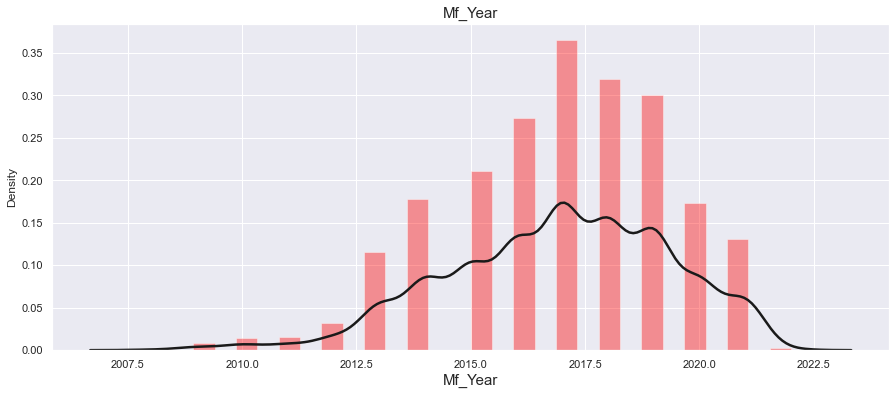

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))

sns.distplot(df['Mf_Year'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Mf_Year', fontsize=15)
plt.xlabel('Mf_Year', fontsize=15)
plt.show()

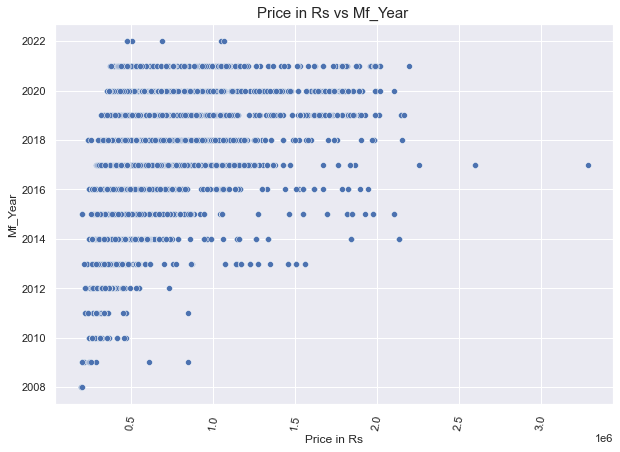

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='Price in Rs',y='Mf_Year')
locs, labels = plt.xticks()
plt.title('Price in Rs vs Mf_Year ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

# Multivariate analysis

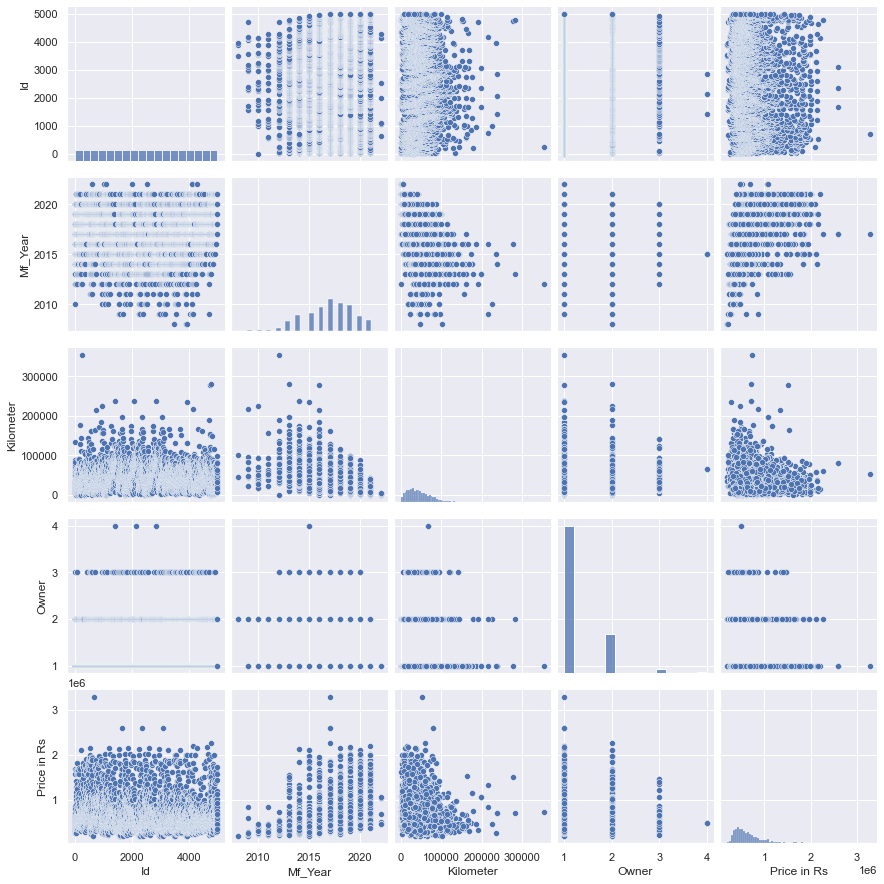

In [17]:
sns.pairplot(df)

# EDA Summary

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1= ['Brand','Fuel','Varient','Model','Price in Rs','Transmission','Location']

for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,Id,Brand,Model,Varient,Mf_Year,Kilometer,Fuel,Owner,Location,Price in Rs,Transmission
0,1.0,5,101,348,2010.0,30152.0,1,1.0,6,479,1
1,2.0,5,100,339,2014.0,32627.0,1,1.0,6,664,1
2,3.0,5,101,210,2014.0,9249.0,1,2.0,6,946,1
3,4.0,5,39,423,2016.0,23846.0,1,3.0,6,867,1
4,5.0,16,82,577,2020.0,87351.0,1,1.0,6,1761,0
...,...,...,...,...,...,...,...,...,...,...,...
5003,5004.0,18,86,226,2021.0,22649.0,1,1.0,0,2527,1
5004,5005.0,5,23,109,2018.0,58756.0,0,1.0,0,184,0
5005,5006.0,7,21,323,2017.0,63038.0,1,1.0,0,144,0
5006,5007.0,11,67,526,2019.0,32473.0,1,1.0,0,1194,1


In [19]:
df.columns

Index(['Id', 'Brand', 'Model', 'Varient', 'Mf_Year', 'Kilometer', 'Fuel',
       'Owner', 'Location', 'Price in Rs', 'Transmission'],
      dtype='object')

# zscore method

In [20]:
from scipy.stats import zscore
from scipy import stats

In [21]:
z=np.abs(zscore(df))
threshold = 3
np.where(z>3)
a=np.array(z)

In [22]:
a

array([[1.73170499, 1.01007724, 1.82707864, ..., 0.80145294, 1.14721482,
        0.38003948],
       [1.73101327, 1.01007724, 1.79341761, ..., 0.80145294, 0.89149389,
        0.38003948],
       [1.73032156, 1.01007724, 1.82707864, ..., 0.80145294, 0.50169225,
        0.38003948],
       ...,
       [1.73032156, 0.5132724 , 0.86580357, ..., 1.6394611 , 1.61027706,
        2.15761082],
       [1.73101327, 0.48033726, 0.6826037 , ..., 1.6394611 , 0.15888797,
        0.38003948],
       [1.73170499, 0.48033726, 1.30339693, ..., 1.6394611 , 0.82514467,
        0.38003948]])

In [23]:
df.drop('Id',inplace=True,axis=1)
df

,Brand,Model,Varient,Mf_Year,Kilometer,Fuel,Owner,Location,Price in Rs,Transmission
0,5,101,348,2010.0,30152.0,1,1.0,6,479,1
1,5,100,339,2014.0,32627.0,1,1.0,6,664,1
2,5,101,210,2014.0,9249.0,1,2.0,6,946,1
3,5,39,423,2016.0,23846.0,1,3.0,6,867,1
4,16,82,577,2020.0,87351.0,1,1.0,6,1761,0
...,...,...,...,...,...,...,...,...,...,...
5003,18,86,226,2021.0,22649.0,1,1.0,0,2527,1
5004,5,23,109,2018.0,58756.0,0,1.0,0,184,0
5005,7,21,323,2017.0,63038.0,1,1.0,0,144,0
5006,11,67,526,2019.0,32473.0,1,1.0,0,1194,1


In [24]:
x=df.drop("Price in Rs", axis=1)
y=df["Price in Rs"]

# Multicollinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
vif = pd.DataFrame()
vif["Features List"]=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif

,Features List,VIF Value
0,Brand,7.404874
1,Model,3.823830
2,Varient,6.181743
3,Mf_Year,32.754960
4,Kilometer,3.919059
5,Fuel,4.095469
6,Owner,7.784107
7,Location,3.843635
8,Transmission,5.751084


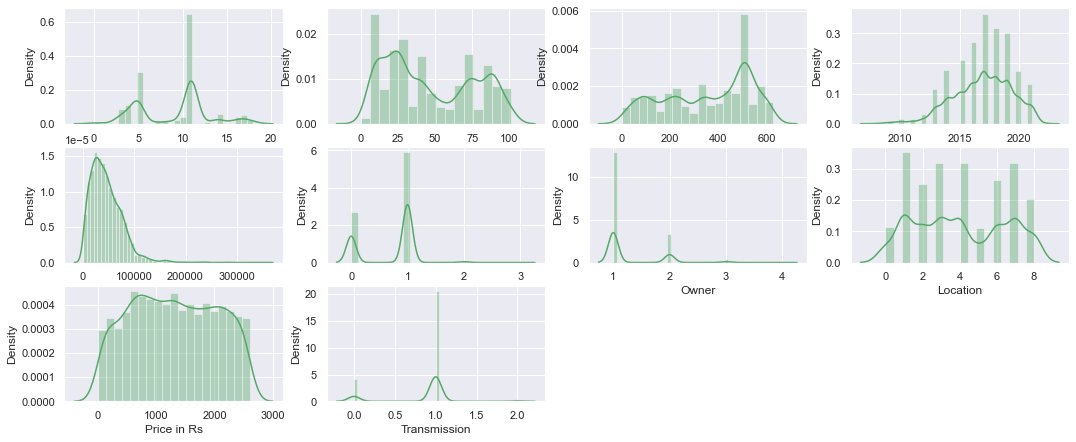

In [27]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [28]:
df.skew()

Brand           0.019008
Model           0.302213
Varient        -0.373741
Mf_Year        -0.426207
Kilometer       1.580831
Fuel           -0.581504
Owner           1.799637
Location        0.102058
Price in Rs     0.022299
Transmission   -1.252696
dtype: float64

skewness more than+/- 0.5 will we treated
object columns will no be treated

# power transform

In [29]:
from sklearn.preprocessing import power_transform

df[['Kilometer','Owner','Transmission']]=power_transform(df[['Kilometer','Owner','Transmission']])

In [30]:
df.skew()

Brand           0.019008
Model           0.302213
Varient        -0.373741
Mf_Year        -0.426207
Kilometer      -0.007076
Fuel           -0.581504
Owner           1.313302
Location        0.102058
Price in Rs     0.022299
Transmission    0.396215
dtype: float64

In [31]:
pd.DataFrame(df).isnull().sum()

Brand           0
Model           0
Varient         0
Mf_Year         0
Kilometer       0
Fuel            0
Owner           0
Location        0
Price in Rs     0
Transmission    0
dtype: int64

In [32]:
x=df.drop(['Price in Rs'],axis=1)
y=df['Price in Rs']

In [33]:
x.shape

(5008, 9)

In [34]:
y.shape

(5008,)

# Min Max Scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [36]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8
count,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000
mean,0.503683,0.462587,0.565426,0.638065,0.395218,0.233560,0.221158,0.503744,0.286348
std,0.223674,0.294167,0.284842,0.172587,0.123802,0.160049,0.409753,0.307293,0.149016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277778,0.207921,0.324324,0.500000,0.312787,0.000000,0.000000,0.250000,0.331236
50%,0.611111,0.386139,0.626391,0.642857,0.400029,0.333333,0.000000,0.500000,0.331236
75%,0.611111,0.742574,0.826709,0.785714,0.482843,0.333333,0.000000,0.750000,0.331236
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.075641609341487
At random state 0, The test accuracy is: 0.07529619384647279


At random state 1, The training accuracy is: 0.07555042489285646
At random state 1, The test accuracy is: 0.07440394175841969


At random state 2, The training accuracy is: 0.07662594953845903
At random state 2, The test accuracy is: 0.0691011241454581


At random state 3, The training accuracy is: 0.07600139961722752
At random state 3, The test accuracy is: 0.07176154247822542


At random state 4, The training accuracy is: 0.07626229444994848
At random state 4, The test accuracy is: 0.07186085230951


At random state 5, The training accuracy is: 0.07462264670217278
At random state 5, The test accuracy is: 0.07778463467327756


At random state 6, The training accuracy is: 0.07411055969501334
At random state 6, The test accuracy is: 0.0803755376656593


At random state 7, The training accuracy is: 0.07794067930763193
At random state 7, The test accuracy is: 0.064

At random state 88, The training accuracy is: 0.07640813644789879
At random state 88, The test accuracy is: 0.07138758092505582


At random state 89, The training accuracy is: 0.07474633157998489
At random state 89, The test accuracy is: 0.07687794852471275


At random state 90, The training accuracy is: 0.07689203787946963
At random state 90, The test accuracy is: 0.0674786880370094


At random state 91, The training accuracy is: 0.07847236904992416
At random state 91, The test accuracy is: 0.0598295036920381


At random state 92, The training accuracy is: 0.08179315361311268
At random state 92, The test accuracy is: 0.0476163153785879


At random state 93, The training accuracy is: 0.07764894688626156
At random state 93, The test accuracy is: 0.0660193618837086


At random state 94, The training accuracy is: 0.0748478941868127
At random state 94, The test accuracy is: 0.075696644133604


At random state 95, The training accuracy is: 0.07391918199739522
At random state 95, The test ac

In [39]:
#splitting the data into 73% training and 27% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=7)

In [40]:
x_train.shape

(3655, 9)

In [41]:
x_test.shape

(1353, 9)

In [42]:
y_train.shape

(3655,)

In [43]:
y_test.shape

(1353,)

In [44]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)


0.073806230918955


In [45]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 479394.52813525085
MAE: 572.4941888665813
r2_score: -11.338688329902356


# Ridge Regression

In [46]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.07376817718607276


In [47]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 479442.63025972724
MAE: 572.9880180226762
r2_score: -11.807431315732163


# SVR(Support Vector Regression)

In [48]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.022098098230683205


In [49]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 508657.2364406301
MAE: 606.4309698660102
r2_score: -163.9458429023895


In [50]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.06279634976164528


In [51]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 493970.0009159376
MAE: 574.185711085007
r2_score: -9.499831152537245


In [52]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.024644232701126367


# Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

0.9677511585313109
MSE: 112882.85278787879
MAE: 160.54257206208428
r2_score: 0.7031811930624998


# Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

1.0
MSE: 150391.8647450111
MAE: 134.38359201773835
r2_score: 0.7113476510397101


# Gradient Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

0.606628268932197
MSE: 231609.2515365384
MAE: 343.38080476614
r2_score: -0.2606764112385538


In [56]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 489847.002471, 75476.727133
R    : 489808.402981, 75447.694818
svr    : 512255.798746, 74080.715983
svr_p    : 502998.182110, 90781.207859
svr_r    : 511783.988776, 72161.121615
RF    : 112428.889263, 119274.335628
DTR    : 187738.831970, 199825.566344
GBR    : 243931.204159, 67924.488928


# HYPER PARAMETER TUNING

In [57]:
from sklearn.model_selection import GridSearchCV

GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [58]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/promilama

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/promilamalik/op

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/promilamalik/op

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/promilamalik/op

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/promilamalik/op

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/promilamalik/op

In [59]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [60]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 109981.61017952698
MAE: 157.4670140428677
r2_score: 0.7135421889335629


<AxesSubplot:xlabel='Price in Rs', ylabel='Density'>

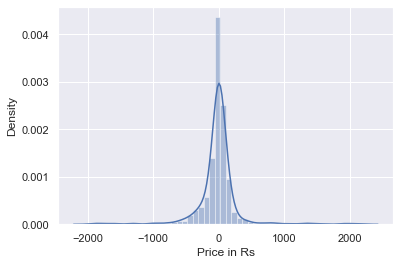

In [61]:
sns.distplot(GF_grid_pred-y_test)

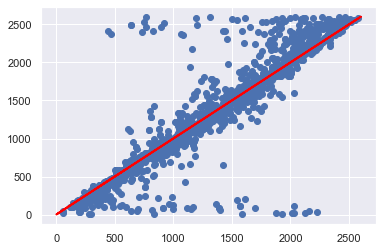

In [62]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

# 'Price in Rs' AS TARGET , CREATING CLASSIFICATION MODEL
Dividing data into X and Y

In [63]:
x=df.drop(['Price in Rs'],axis=1)
y=df['Price in Rs']

In [64]:
x.shape

(5008, 9)

In [65]:
y.shape

(5008,)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [68]:
x_train.shape

(3655, 9)

In [69]:
x_test.shape

(1353, 9)

In [70]:
y_train.shape

(3655,)

In [71]:
y_test.shape

(1353,)

In [72]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# Logistic Regression

In [73]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

[CV] END ....................criterion=mse, n_estimators=100; total time=   1.7s
[CV] END ....................criterion=mse, n_estimators=100; total time=   1.8s
[CV] END ....................criterion=mse, n_estimators=100; total time=   1.7s
[CV] END ....................criterion=mse, n_estimators=200; total time=   3.5s
[CV] END ....................criterion=mse, n_estimators=200; total time=   3.6s
[CV] END ....................criterion=mae, n_estimators=100; total time=  47.6s
[CV] END ....................criterion=mae, n_estimators=100; total time=  52.3s
[CV] END ....................criterion=mae, n_estimators=100; total time=  59.4s
[CV] END ....................criterion=mae, n_estimators=200; total time= 2.1min
[CV] END ....................criterion=mae, n_estimators=200; total time= 2.1min
[CV] END ....................criterion=mse, n_estimators=100; total time=   1.7s
[CV] END ....................criterion=mse, n_estimators=100; total time=   1.8s
[CV] END ...................

In [74]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))


0.004434589800443459
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00     

Test accuracy:: 0.004434589800443459


# Decision Tree Classifier

In [75]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.5738704409363092


In [76]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.4663710273466371
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          27       1.00      0.50      0.67         2
          28       0.00      0.00      0.00         0
          29       1.00      1.00      1.00         1
          35       1.00      1.00      1.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00       

# KNeighbors Classifier

In [77]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.1369769950608274


In [78]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.09090909090909091
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00      

Training accuracy:: 0.40683994528043776
Test accuracy:: 0.09090909090909091


# Random Forest Classifier

In [79]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.5764704357518727


In [80]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.4737620103473762
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          27       0.67      1.00      0.80         2
          29       1.00      1.00      1.00         1
          31       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          35       0.50      1.00      0.67         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          39       0.00      0.00      0.00       

Training accuracy:: 1.0
Test accuracy:: 0.4737620103473762


# Ada Boost Classifier

In [81]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.0025960079840319362


In [82]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.0014781966001478197
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         2
          47       0.00      0.00      0.00    

Training accuracy:: 0.0038303693570451436
Test accuracy:: 0.0014781966001478197


# Bagging Classifier

In [83]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.591245508982036


In [84]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.4959349593495935
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          27       0.67      1.00      0.80         2
          28       0.00      0.00      0.00         0
          29       0.33      1.00      0.50       

Training accuracy:: 0.9934336525307798
Test accuracy:: 0.4959349593495935


# Random Forest Classifier

In [86]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [87]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [88]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.48410938654841096


In [89]:
rfc_grid.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

In [90]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10] }   

In [91]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [92]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.4781966001478197


In [93]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          27       0.67      1.00      0.80         2
          28       0.00      0.00      0.00         0
          29       1.00      1.00      1.00         1
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         0
          35       0.50      1.00      0.67         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         0
  

<AxesSubplot:>

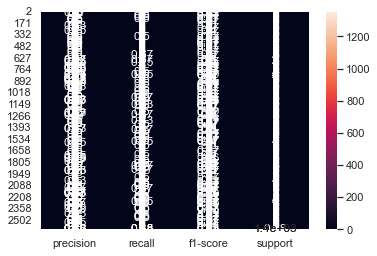

In [94]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

# Saving the Model

In [95]:
import joblib
joblib.dump(best_rfc_grid.best_estimator_,'car price.obj')

['car price.obj']

In [96]:
import pickle
filename="car price prediction.pkl "
pickle.dump(best_rfc_grid, open(filename,'wb'))

In [97]:
import numpy as np
a=np.array(y_test)
predicted= np.array(best_rfc_pred)
rf_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
rf_com

,original,predicted
0,469,469
1,2008,2008
2,802,802
3,735,678
4,1719,1719
...,...,...
1348,480,468
1349,2004,2004
1350,1375,1066
1351,115,115


[CV] END criterion=gini, min_samples_split=2, n_estimators=200, random_state=10; total time= 1.0min
[CV] END criterion=gini, min_samples_split=2, n_estimators=50, random_state=10; total time=  13.6s
[CV] END criterion=gini, min_samples_split=3, n_estimators=200, random_state=10; total time=  54.3s
[CV] END criterion=gini, min_samples_split=3, n_estimators=50, random_state=10; total time=  12.2s
[CV] END criterion=entropy, min_samples_split=2, n_estimators=200, random_state=10; total time= 1.1min
[CV] END criterion=entropy, min_samples_split=2, n_estimators=50, random_state=10; total time=  16.2s
[CV] END criterion=entropy, min_samples_split=3, n_estimators=200, random_state=10; total time= 1.1min
[CV] END criterion=entropy, min_samples_split=3, n_estimators=50, random_state=10; total time=  13.3s
[CV] END criterion=gini, min_samples_split=2, n_estimators=200, random_state=10; total time= 1.0min
[CV] END criterion=gini, min_samples_split=2, n_estimators=200, random_state=10; total time=